<a href="https://colab.research.google.com/github/n-cai/Data_Visualization/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Import

In [ ]:
df=pd.read_csv('Nigerian_Car_Prices.csv', index_col=0)
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


# Data Explore

In [ ]:
df.describe()

,Year of manufacture,Mileage,Engine Size
count,3617.000000,4.024000e+03,3584.000000
mean,2007.898535,1.825337e+05,3274.976562
std,4.300126,2.109233e+05,7693.489588
min,1992.000000,1.000000e+00,3.000000
25%,2005.000000,1.020640e+05,2000.000000
50%,2008.000000,1.613525e+05,2500.000000
75%,2011.000000,2.319522e+05,3500.000000
max,2021.000000,9.976050e+06,371000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  3617 non-null   float64
 2   Condition            3616 non-null   object 
 3   Mileage              4024 non-null   float64
 4   Engine Size          3584 non-null   float64
 5   Fuel                 3607 non-null   object 
 6   Transmission         4075 non-null   object 
 7   Price                4095 non-null   object 
 8   Build                1127 non-null   object 
dtypes: float64(3), object(6)
memory usage: 319.9+ KB


In [ ]:
df['Price']=df['Price'].astype('str').replace(',','', regex=True).astype('float64')
#print (df['Price'])
df['Year of manufacture']=df['Year of manufacture'].astype('str').replace('\.0','', regex=True)
print(df['Year of manufacture'])


0       2007
1        nan
2       2008
3        nan
4        nan
        ... 
4090    2004
4091    2005
4092    2006
4093    2007
4094    2013
Name: Year of manufacture, Length: 4095, dtype: object


In [ ]:
numerical_cols=df.columns[df.dtypes=='float64'].to_list()
print(numerical_cols)
categorical_cols=df.columns[df.dtypes=='object'].to_list()
binary_cols=df[categorical_cols].nunique()[df[categorical_cols].nunique()==2].index.to_list()
single_cols=df[categorical_cols].nunique()[df[categorical_cols].nunique()==1].index.to_list()
multi_cols=df[categorical_cols].nunique()[df[categorical_cols].nunique()>2].index.to_list()
print (binary_cols)
print(single_cols)
print(multi_cols)

['Mileage', 'Engine Size', 'Price']
[]
['Build']
['Make', 'Year of manufacture', 'Condition', 'Fuel', 'Transmission']


In [ ]:
for item in multi_cols:
  print(item)
  print(df[item].value_counts(dropna=False))
  print('--------------------------------')


Make
Toyota           1469
Lexus             464
Mercedes-Benz     436
Honda             428
Ford              197
Hyundai           179
Nissan            173
Kia                90
Land Rover         74
Volkswagen         64
Mazda              63
BMW                63
Acura              56
Infiniti           41
Chevrolet          40
Peugeot            36
Mitsubishi         23
Pontiac            22
Volvo              22
Suzuki             21
Dodge              17
Audi               14
Opel               12
Jaguar             11
Jeep               11
Porsche             9
Renault             8
Chrysler            7
Fiat                6
GMC                 5
Changan             4
Lincoln             4
Skoda               3
Hummer              2
Buick               2
JAC                 2
Citroen             2
Isuzu               2
Mini                2
MG                  2
Rover               1
Bentley             1
Seat                1
SsangYong           1
Cadillac            1
Satur

# Data Clean


In [ ]:
for item in numerical_cols:
  print(item)
  print(df[item].isna().sum())

Mileage
71
Engine Size
511
Price
0


In [ ]:
print(df['Make'].isna().sum())

0


In [ ]:
df_clean=df.dropna(subset=['Mileage'])
print(df_clean)

               Make Year of manufacture      Condition   Mileage  Engine Size  \
0            Toyota                2007  Nigerian Used  166418.0       2400.0   
1             Lexus                 nan            NaN  138024.0          NaN   
2     Mercedes-Benz                2008  Nigerian Used  376807.0       3000.0   
3             Lexus                 nan            NaN  213362.0          NaN   
4     Mercedes-Benz                 nan            NaN  106199.0          NaN   
...             ...                 ...            ...       ...          ...   
4090          Honda                2004  Nigerian Used  207446.0       3500.0   
4091         Toyota                2005  Nigerian Used  106914.0       1800.0   
4092          Honda                2006  Nigerian Used  247149.0       1800.0   
4093         Toyota                2007  Nigerian Used  249325.0       2500.0   
4094         Toyota                2013   Foreign Used  235184.0       2500.0   

        Fuel Transmission  

               Make Year of manufacture      Condition   Mileage  Engine Size  \
0            Toyota                2007  Nigerian Used  166418.0       2400.0   
1             Lexus                 nan            NaN  138024.0          NaN   
2     Mercedes-Benz                2008  Nigerian Used  376807.0       3000.0   
3             Lexus                 nan            NaN  213362.0          NaN   
4     Mercedes-Benz                 nan            NaN  106199.0          NaN   
...             ...                 ...            ...       ...          ...   
4090          Honda                2004  Nigerian Used  207446.0       3500.0   
4091         Toyota                2005  Nigerian Used  106914.0       1800.0   
4092          Honda                2006  Nigerian Used  247149.0       1800.0   
4093         Toyota                2007  Nigerian Used  249325.0       2500.0   
4094         Toyota                2013   Foreign Used  235184.0       2500.0   

        Fuel Transmission  

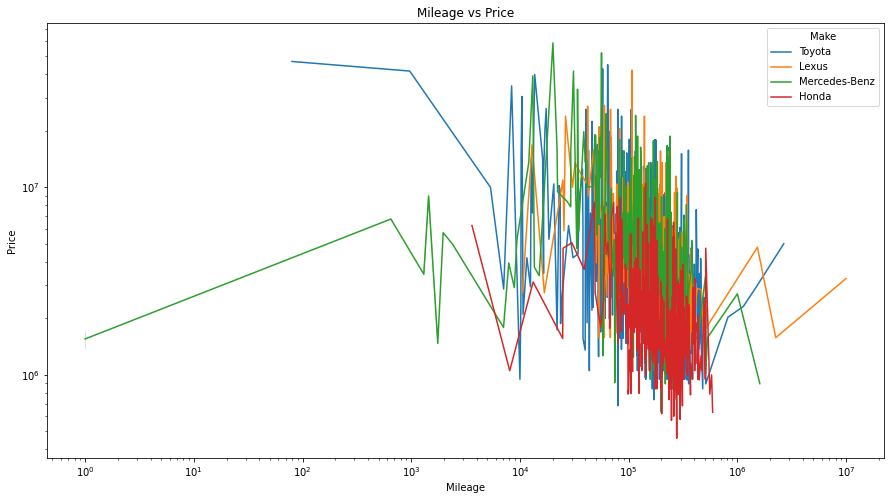

In [ ]:
df_new=df_clean[(df_clean['Make']=='Toyota') | (df_clean['Make']=='Lexus') | (df_clean['Make']=='Mercedes-Benz') | (df_clean['Make']=='Honda')]
print(df_new)
#df_new['Make'].value_counts()
plt.figure(figsize=(15,8))
results=sns.lineplot(data=df_new, x='Mileage', y='Price', hue='Make')
results.set(xscale='log')
results.set(yscale='log')
plt.title('Mileage vs Price')
plt.show()

0


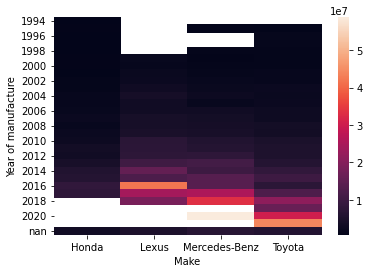

In [ ]:
df_new.dropna(subset=['Year of manufacture'])
print(df_new['Year of manufacture'].isna().sum())
sns.heatmap(df_new.pivot_table('Price', index='Year of manufacture', columns='Make'))
